In [1]:
import numpy as np
import SimpleITK as sitk
import re
import os

# Ensure the 'rois' directory exists
if not os.path.exists('rois'):
    os.makedirs('rois')

# Read the region list from the provided regions.txt file
region_list = []
with open("../lables/regions.txt") as f:
    for line in f.readlines():
        elements = line.split("\t")
        region_list.append([elements[0], elements[1].strip()])

print(region_list)

# Read the image
img = sitk.ReadImage("../lables/A0.nii.gz")
nda = sitk.GetArrayFromImage(img)
id_list = np.unique(nda)

print(len(id_list))

# Process each unique region ID in the image
for i in range(len(id_list)):
    nda_working = nda.copy()
    nda_working[nda_working != id_list[i]] = 0
    img_out = sitk.GetImageFromArray(nda_working)
    img_out.CopyInformation(img)
    abbrev = "nothing"
    for j in range(len(region_list)):
        if int(region_list[j][0]) == id_list[i]:
            abbrev = region_list[j][1]
            abbrev = abbrev.replace("/", "-")
    if abbrev != "nothing":
        sitk.WriteImage(
            img_out, "./rois/roi-" + str(int(id_list[i])) + "-" + abbrev + ".nii.gz"
        )


[['1', 'Left Hippocampus'], ['2', 'External Capsule'], ['3', 'Left Caudate Putamen'], ['4', 'Left Ant Commissure'], ['5', 'Left Globus Pallidus'], ['6', 'Left Internal Capsule'], ['7', 'Left Thalamus'], ['8', 'Left Cerebellum'], ['9', 'Left Superior Colliculi'], ['10', 'Ventricles'], ['11', 'Left Hypothalamus'], ['12', 'Left Inferior Colliculi'], ['13', 'Left Central Gray'], ['14', 'Left Neocortex'], ['15', 'Left Amygdala'], ['16', 'Left Olfactory bulb'], ['17', 'Brain Stem'], ['18', 'Left Rest of Midbrain'], ['19', 'Left Basal Forebrain Septum'], ['20', 'Left Fimbria'], ['21', 'Right Hippocampus'], ['22', 'None (Right External Capsule label merged into label 2, covering the entire Corpus Callosum region)'], ['23', 'Right Caudate Putamen'], ['24', 'Right Ant Commissure'], ['25', 'Right Globus Pallidus'], ['26', 'Right Internal Capsule'], ['27', 'Right Thalamus'], ['28', 'Right Cerebellum'], ['29', 'Right Superior Colliculi'], ['30', 'None (Right Ventricles label merged with label 10)']

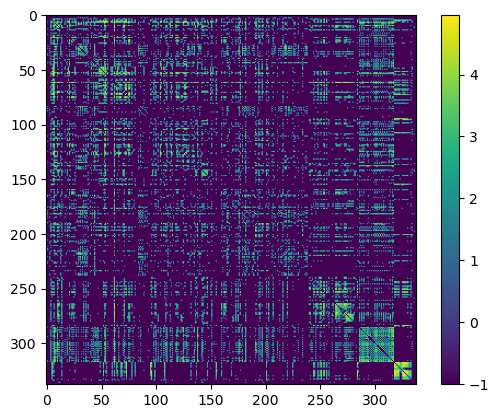

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os

mat_contents=sio.loadmat('../data/_archive/lables/whole_brain_ROIs.mat')
connectivity=mat_contents['connectivity']

plt.imshow(np.log10(connectivity+0.1))
plt.colorbar()
plt.show()

# Visualize connectivity

In [6]:
mat_files = [f for f in os.listdir('../data/_archive/lables/matrix/') if f.endswith('.mat')]
mat_files

['whole_brain_ABA_SU222.mat',
 'whole_brain_ABA_SU217.mat',
 'whole_brain_ABA_SU221.mat',
 'whole_brain_SU223.mat']

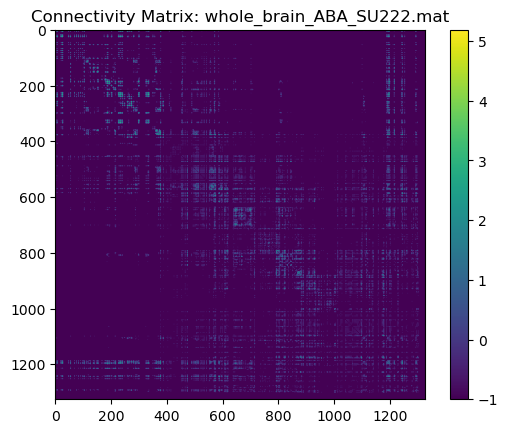

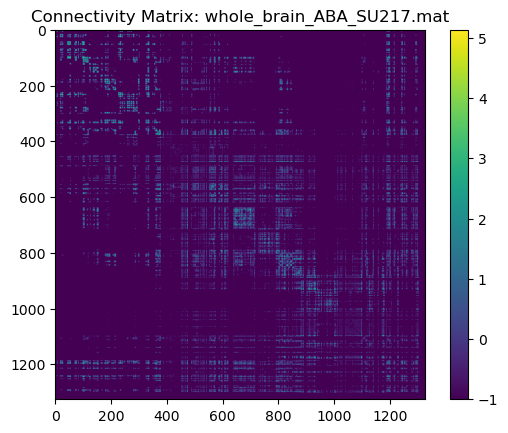

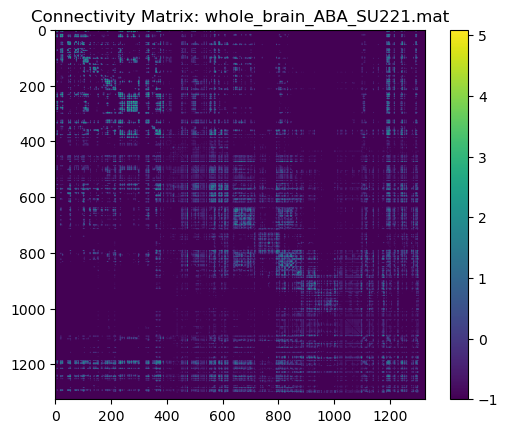

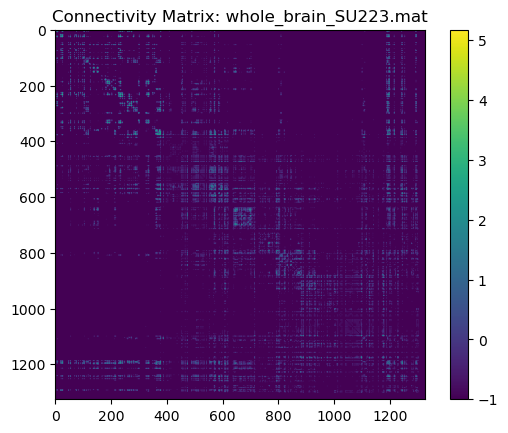

In [7]:
for file in mat_files:
    mat_contents = sio.loadmat(os.path.join('../data/_archive/lables/matrix/', file))
    if 'connectivity' in mat_contents:
        connectivity = mat_contents['connectivity']
        plt.imshow(np.log10(connectivity + 0.1))
        plt.colorbar()
        plt.title(f'Connectivity Matrix: {file}')
        plt.show()

# Check brain region

In [8]:
import scipy.io

data = scipy.io.loadmat('../lables/whole_brain_ROIs.mat')
data.keys()

dict_keys(['connectivity', 'name', 'atlas'])

In [11]:
connectivity = data['connectivity']
names = data['name']
atlas = data['atlas']

connectivity_shape = connectivity.shape
names_shape = names.shape
atlas_shape = atlas.shape

connectivity_shape, names_shape, atlas_shape

((338, 338), (1, 10208), (1, 4))

In [14]:
sample_names = names[0, :10]
sample_atlas = atlas[0]

sample_names, sample_atlas

(array([ 65,  99,  99, 101, 115, 115, 111, 114, 121,  95], dtype=uint8),
 array([114, 111, 105,   0], dtype=uint8))

In [15]:
decoded_names = ''.join(chr(i) for i in sample_names)
decoded_atlas = ''.join(chr(i) for i in sample_atlas if i != 0)

decoded_names, decoded_atlas

('Accessory_', 'roi')

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

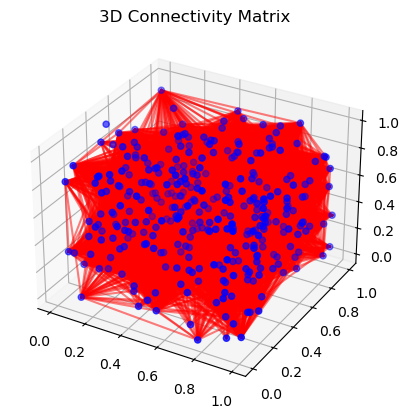

In [18]:
coordinates = np.random.rand(338, 3)
# Plotting the connectivity matrix in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot regions
ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], c='b', marker='o')

# Plot connections
threshold = 0.5  # Threshold to filter strong connections
for i in range(connectivity.shape[0]):
    for j in range(i + 1, connectivity.shape[1]):
        if connectivity[i, j] > threshold:
            ax.plot([coordinates[i, 0], coordinates[j, 0]],
                    [coordinates[i, 1], coordinates[j, 1]],
                    [coordinates[i, 2], coordinates[j, 2]], 'r-', alpha=0.5)

ax.set_title('3D Connectivity Matrix')
plt.show()